In [1]:
# Import needed packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, make_scorer


import statistics as stat

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# class distribution
# transported: False = 0, True = 1
train_data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

the train data is almost balanced

# Pre-Processing

In [4]:
# by default majority class (not transported (False)) will be negative
lb = LabelBinarizer()
train_data['Transported'] = lb.fit_transform(train_data['Transported'].values)
targets = train_data['Transported']

The .isnull() method in Python searches for both None and NaN values

In [5]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))



Null Values in Training 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Duplicated values in train 0


we have null values everywhere:

In [6]:
#Removing less important features
train_data.drop(['PassengerId','Name','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1, inplace = True)


# Treatment of missing data and duplicates

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
 5   Transported  8693 non-null   int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 373.7+ KB


Filling Age by the mean method


In [8]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))


Null Values in Training 
HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64


Text(0.5, 1.0, 'Null values we Have to handle')

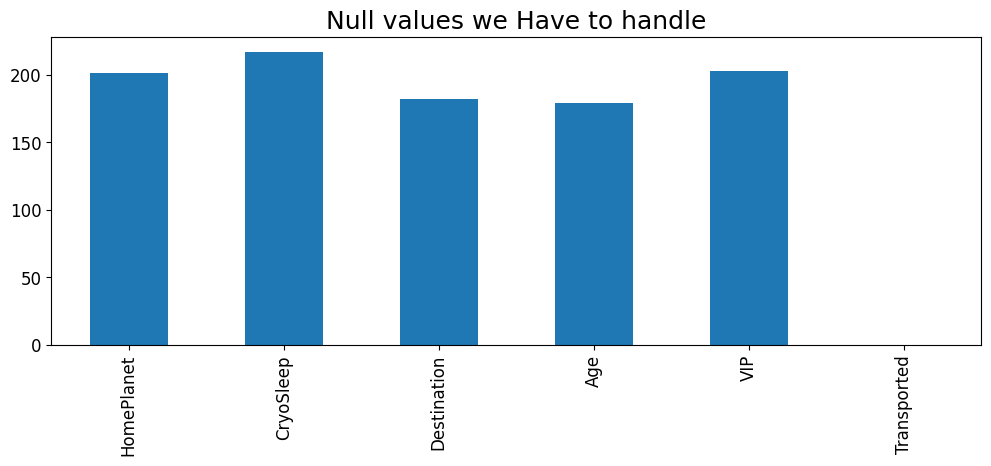

In [9]:

def remove_high_nan(df,ratio = 0.65):
    for i in df.columns:
        if df[i].isnull().mean() > ratio:
            df.drop(i,axis = 1,inplace = True)


remove_high_nan(train_data)
data_2 = train_data.copy()
train_data.isnull().sum().plot(kind = 'bar',fontsize = 12,figsize = (12,4))
plt.title('Null values we Have to handle',fontsize = 18)

In [10]:
train_data['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [11]:
categories = {"Earth": 1, "Europa": 0,"Mars":2}
train_data['HomePlanet']= train_data['HomePlanet'].map(categories)

In [12]:
train_data['HomePlanet'].value_counts(dropna=False)

HomePlanet
1.0    4602
0.0    2131
2.0    1759
NaN     201
Name: count, dtype: int64

In [13]:
train_data['CryoSleep'].value_counts(dropna=False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [14]:
train_data['CryoSleep'] = train_data['CryoSleep'].replace({True: 1, False: 0})

In [15]:
train_data['CryoSleep'].value_counts(dropna=False)

CryoSleep
0.0    5439
1.0    3037
NaN     217
Name: count, dtype: int64

In [16]:
train_data['Destination'].value_counts(dropna=False)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

In [17]:
categories = {"TRAPPIST-1e": 1, "55 Cancri e": 0,"PSO J318.5-22":2}
train_data['Destination']= train_data['Destination'].map(categories)

In [18]:
train_data['Destination'].value_counts(dropna=False)

Destination
1.0    5915
0.0    1800
2.0     796
NaN     182
Name: count, dtype: int64

In [19]:
train_data['VIP'].value_counts(dropna=False)

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [20]:
train_data['VIP'] = train_data['VIP'].replace({True: 1, False: 0})

In [21]:
train_data['VIP'].value_counts(dropna=False)

VIP
0.0    8291
NaN     203
1.0     199
Name: count, dtype: int64

In [22]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,0.0,0.0,1.0,39.0,0.0,0
1,1.0,0.0,1.0,24.0,0.0,1
2,0.0,0.0,1.0,58.0,1.0,0
3,0.0,0.0,1.0,33.0,0.0,0
4,1.0,0.0,1.0,16.0,0.0,1


In [23]:
from missforest.missforest import MissForest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


clf = RandomForestClassifier(n_jobs=-1)
rgr = RandomForestRegressor(n_jobs=-1)

mf = MissForest(clf, rgr)
df_imputed = mf.fit_transform(train_data)

In [24]:
df_imputed.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [ ]:
null_attr = train_data.isnull().sum()[train_data.isnull().sum() != 0].index

f,ax= plt.subplots(1,len(null_attr),figsize = (18,6))
plt.style.use('seaborn-v0_8-colorblind')

for pos,i in enumerate(null_attr):
    ax[pos].hist(train_data[i])
    ax[pos].set_title(i)


In [ ]:
def add_label(data,attr,name_notnan = 'Training', name_nan = 'Predict'):
    null_pos = data[attr][data[attr].isnull()].index
    data['Label'] = name_notnan
    data['Label'].iloc[null_pos] = name_nan
    

def mean_median_imputation(data, kind = 'mean'):
    if kind=='mean':
        return data.fillna(np.mean(data.dropna()))
    elif kind == 'median': 
        return data.fillna(np.median(data.dropna()))


def mode_imputation(data):
    return data.fillna(stat.mode(data))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

def Miss_forest_impute(data, attrb, dtype):
    train_data1, test_data1 = data[data['Label']=='Training'], data[data['Label']=='Predict']
    
    Y = data[[attrb]]
    X = data.drop(['Label',attrb],axis = 1)
    
    y_train = train_data1[[attrb]]
    x_train = train_data1.drop(['Label',attrb],axis = 1)
    
    y_test = test_data1[[attrb]]
    x_test = test_data1.drop(['Label',attrb],axis = 1)
  
    if dtype == 'Continious':
        model = RandomForestRegressor()
        model.fit(X,Y)

    elif dtype == 'Categorical':
        model = RandomForestClassifier()
        model.fit(X,Y)
    
    y_pred = model.predict(x_test)

    return y_pred, Y[data['Label']=='Predict'].index

In [ ]:
train_data = pd.get_dummies(train_data)                                                  # Handling Categorical Values  
not_null_attr = train_data.isnull().sum()[train_data.isnull().sum()==0].index            # Not Null Attributes   
null_attr = train_data.isnull().sum()[train_data.isnull().sum() != 0].index              # Null Attributes  
attrbs = {}
njobs = 4


In [ ]:
null_attr

In [ ]:

for i in null_attr: 
    df = pd.concat((train_data[not_null_attr], train_data[i]), axis = 1)
    add_label(df,i)

    if i=='Age':  
        df[i] = mean_median_imputation(df[[i]],kind = 'mean')

        for job in range(njobs):
            value,index = Miss_forest_impute(df,i,dtype = 'Continious')   
            df[i].iloc[index] = value
    else:
        df[i] = mode_imputation(df[i]) 

        for job in range(njobs):
            value,index = Miss_forest_impute(df,i,dtype = 'Categorical')
            df[i].iloc[index] = value

    attrbs[i] = df[i]

In [ ]:
count = 1

In [ ]:
if count:    
    data_2.drop(null_attr,axis = 1,inplace=True)
    count = 0

data_final = pd.concat((data_2,pd.DataFrame(attrbs)),axis = 1)
data_final.head(8693)

In [ ]:
print('\nNull Values in Training \n{}'.format(data_final.isnull().sum()))

age_class_series = pd.cut(train_data['Age'], bins=[0, 12, 19, 55, 100],
       labels=['children', 'young', 'adult', '55+'])
train_data['Age-class'] = age_class_series


age_class_series_test_data = pd.cut(test_data['Age'], bins=[0, 12, 19, 55, 100],
       labels=['children', 'young', 'adult', '55+'])
test_data['Age-class'] = age_class_series_test_data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_data, targets,random_state=42,test_size=0.2,stratify=targets)

train_test_split with stratify=True results in consistent class distribution betwen training and test sets.

In [26]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
Transported
1    0.503595
0    0.496405
Name: proportion, dtype: float64
y_test class distribution
Transported
1    0.503738
0    0.496262
Name: proportion, dtype: float64


Random Forest - Score:  1.0


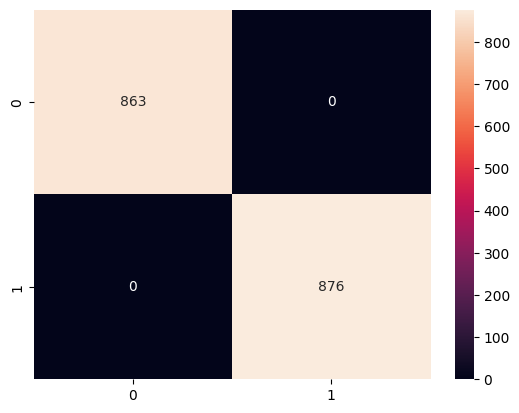

In [27]:
clf = RandomForestClassifier(n_jobs=-1,random_state=42)
clf.fit(X_train, y_train)
pred_1 = clf.predict(X_test)
score_1 = accuracy_score(y_test, pred_1)
print("Random Forest - Score: ", score_1)
cm = confusion_matrix(y_test, pred_1)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(n_jobs=-1,random_state=42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60, stop = 180, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [6, 7, 8,9,10,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,9,10,11,12,13,14,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


In [ ]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

In [ ]:
clf_random.best_params_

In [ ]:
clf_random.best_estimator_

In [ ]:

pred_1_random = clf_random.predict(X_test)
score_1_random = accuracy_score(y_test, pred_1_random)
print("Random Forest - Score: ", score_1_random)
cm = confusion_matrix(y_test, pred_1_random)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [11,12,13],
    'min_samples_split': [2,3,4],
    'n_estimators': [123,133, 143, 153]
}
# Create a based model
clf = RandomForestClassifier(n_jobs=-1,random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
pred_1_grid = best_grid.predict(X_test)
score_1_grid = accuracy_score(y_test, pred_1_grid)
print("Random Forest - Score: ", score_1_grid)
cm = confusion_matrix(y_test, pred_1_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
predictions = best_grid.predict(test_data)

In [ ]:
predictions = predictions.astype(dtype=bool)

In [ ]:
output = pd.DataFrame({'PassengerId': pd.read_csv("test.csv").PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")